# Stock Sharpe Ratio Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol = 'BAC'

In [3]:
df = yf.download("BAC", start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
returns = df['Adj Close'].pct_change()[1:].dropna()

In [5]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [6]:
def sharpe_ratio(returns, rf):
    return np.mean(returns - rf)/np.std(returns - rf)

Text(0, 0.5, 'Sharpe Ratio')

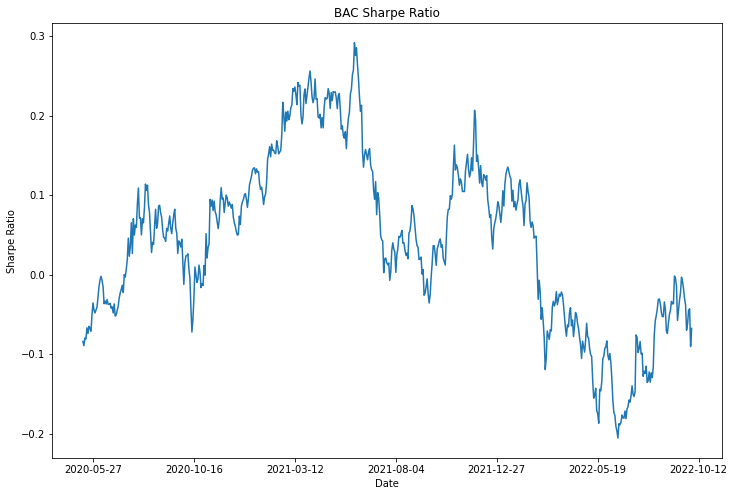

In [7]:
# Compute the running Sharpe ratio
running_sharpe = [sharpe_ratio(returns[i-90:i], rf[i-90:i]) for i in range(90, len(returns))]

# Plot running Sharpe ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(returns)-100), running_sharpe[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([df['Adj Close'].index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')

In [8]:
sharpe_ratio(returns, rf)

0.013086366853171839